In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# Load Titanic dataset
titanic = sns.load_dataset('titanic')
print(titanic.head())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


In [5]:
# Check for missing values and basic info
print(titanic.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None


In [7]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


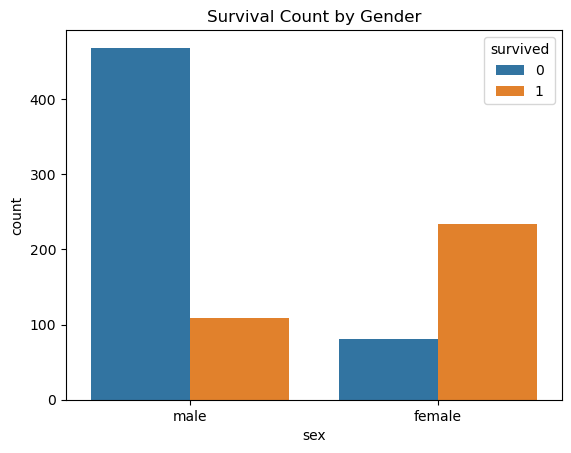

In [50]:
# Basic pattern: survival by sex
sns.countplot(data=titanic, x='sex', hue='survived')#hue adds colour to distinguish the data
plt.title("Survival Count by Gender")
plt.show()

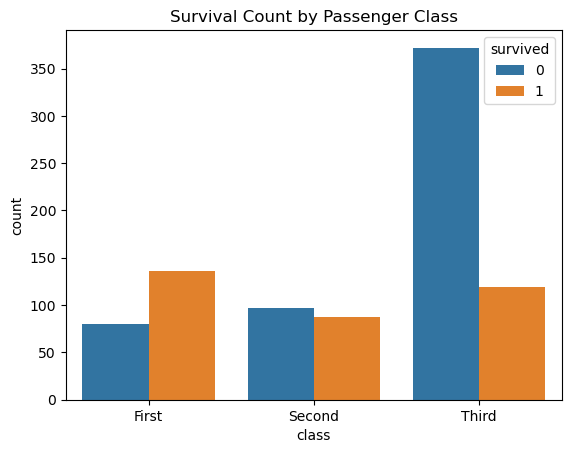

In [17]:

# Pattern: survival by class
sns.countplot(data=titanic, x='class', hue='survived')
plt.title("Survival Count by Passenger Class")
plt.show()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_21904\1210902909.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanic['fare'])


<Axes: xlabel='fare', ylabel='Density'>

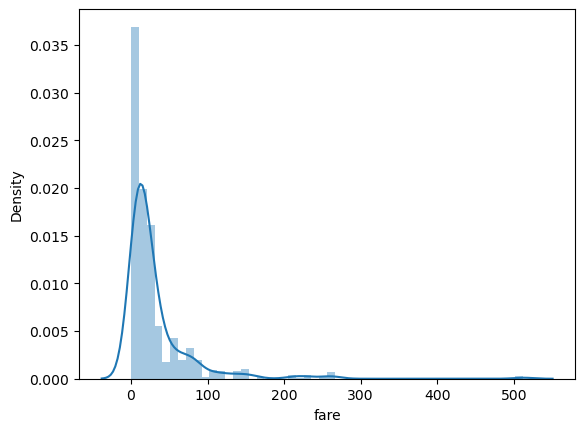

In [9]:
sns.distplot(titanic['fare'])

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_21904\1517045234.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanic['fare'], kde=False)


<Axes: xlabel='fare'>

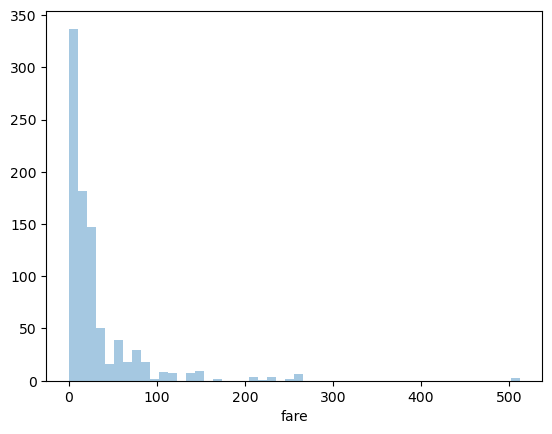

In [11]:
sns.distplot(titanic['fare'], kde=False)


Meaning:
This line uses Seaborn's distplot() to visualize the distribution of the 'fare' column.

Breakdown:
titanic['fare']: Selects the 'fare' column from the DataFrame.

sns.distplot(...): Plots a distribution plot.

kde=False: Disables the KDE (Kernel Density Estimate) curve, so only the histogram bars will be shown.

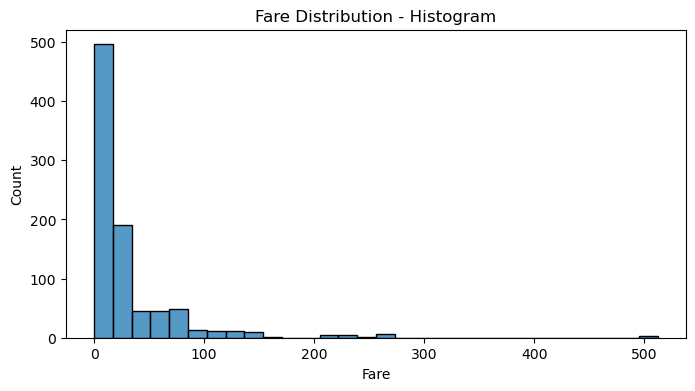

In [19]:
# Histogram
plt.figure(figsize=(8, 4))
sns.histplot(titanic['fare'], kde=False, bins=30)
plt.title("Fare Distribution - Histogram")
plt.xlabel("Fare")
plt.ylabel("Count")
plt.show()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_21904\969875229.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanic['fare'], bins=30, kde=True)


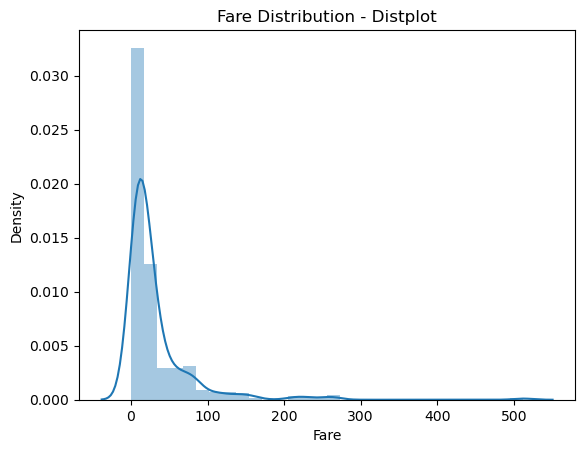

In [21]:
# Distplot (deprecated in newer versions, replaced by displot)
sns.distplot(titanic['fare'], bins=30, kde=True)
plt.title("Fare Distribution - Distplot")
plt.xlabel("Fare")
plt.ylabel("Density")
plt.show()

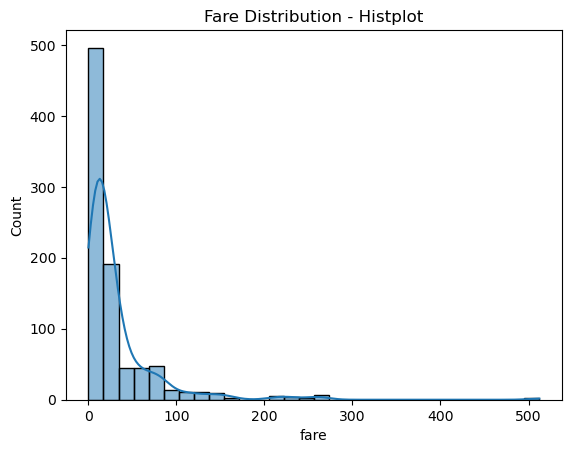

In [23]:
# Histplot (modern version)
sns.histplot(data=titanic, x='fare', bins=30, kde=True)
plt.title("Fare Distribution - Histplot")
plt.show()

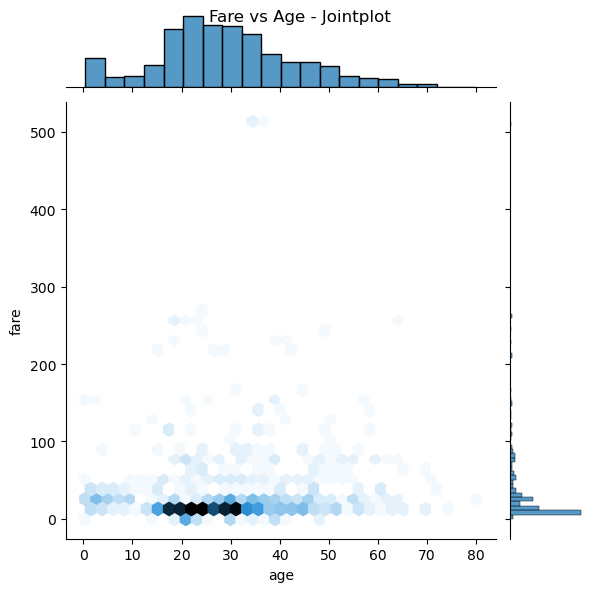

In [33]:
# Jointplot
sns.jointplot(x='age', y='fare', data=titanic, kind='hex')
plt.suptitle("Fare vs Age - Jointplot")
plt.show()


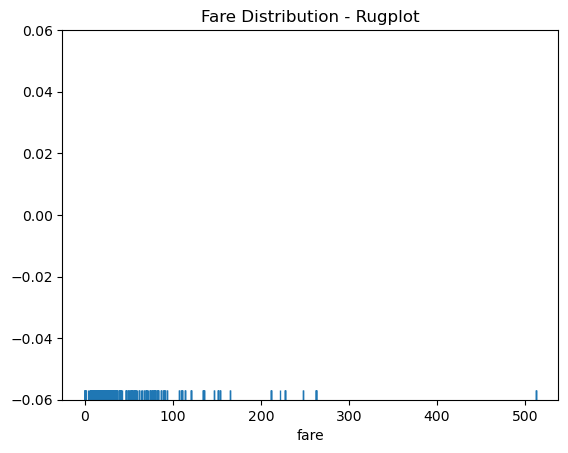

In [31]:

#The rugplot() is used to draw small bars along x-axis for each point in the dataset
sns.rugplot(titanic['fare'])
plt.title("Fare Distribution - Rugplot")
plt.show()

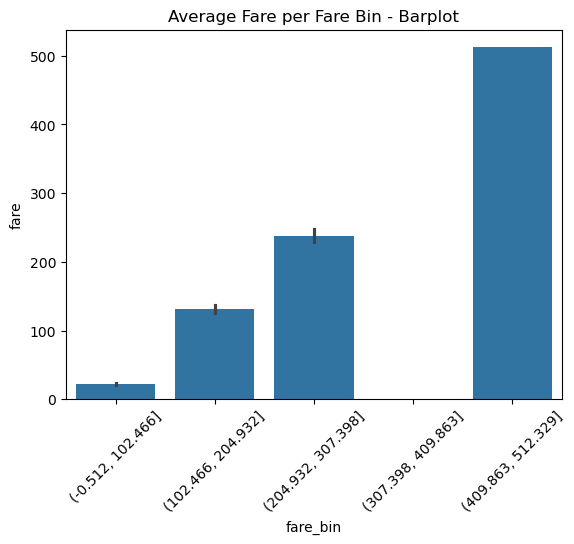

In [47]:
titanic['fare_bin'] = pd.cut(titanic['fare'], bins=5)
sns.barplot(data=titanic, x='fare_bin', y='fare')
plt.title("Average Fare per Fare Bin - Barplot")
plt.xticks(rotation=45)
plt.show()

Bin the fare column into 5 ranges,

Plot the average fare for each bin using barplot.